<a href="https://colab.research.google.com/github/NagamallaVinay/Task-3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 3: LINEAR REGRESSION**

 **Objective:** Implement and understand simple & multiple linear regression.
  
**Tools:**  Scikit-learn, Pandas, Matplotlib


In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid", palette="rocket")
plt.style.use('seaborn-v0_8-whitegrid')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
df = pd.read_csv('Housing.csv')
print("Housing dataset loaded successfully.\n")

Housing dataset loaded successfully.



# **1.Import and preprocess the dataset.**

Here, we will load the Housing.csv file, inspect it, and prepare it for our model. This involves converting categorical data (like 'yes'/'no') into numerical format.

In [4]:
 # Initial exploration
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset Info (Data Types and Nulls):")
df.info()

# Preprocessing: Convert categorical columns to numerical format

categorical_cols = df.select_dtypes(include=['object']).columns

print(f"\nCategorical columns to process: {list(categorical_cols)}")

# Convert binary 'yes'/'no' columns to 1  or 0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Using One-Hot Encoding for 'furnishingstatus' as it has 3 categories
# drop_first=True avoids multicollinearity (dummy variable trap)
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print("\nPreprocessing complete. All features are now numerical.")
print("First 5 rows of the processed dataset:")
display(df.head())

# Define Features (X) and Target (y)
X = df.drop('price', axis=1)
y = df['price']

# Feature Scaling for better coefficient interpretation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeatures have been scaled using StandardScaler.")


First 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Dataset Info (Data Types and Nulls):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Categorical columns to process: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefar

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False



Features have been scaled using StandardScaler.


# **2.Split data into train-test sets.**
We'll now divide our dataset into a training set (to teach the model) and a testing set (to evaluate performance on unseen data). An 70/30 split is a common standard.

In [5]:
print("Splitting the data into training (70%) and testing (30%) sets...")
# random_state ensures that the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")
print("Data splitting complete.\n")

Splitting the data into training (70%) and testing (30%) sets...
Training set has 381 samples.
Testing set has 164 samples.
Data splitting complete.



# **3.Fit a Linear Regression model using sklearn.linear_model**.

Using the scikit-learn library, we will create an instance of the LinearRegression model and train it using our training data.


In [6]:
print("Initializing and training the Linear Regression model...")
# Create an instance of the model
model = LinearRegression()

# Train the model with our training data
model.fit(X_train, y_train)

print("successfully completed Model training .\n")

Initializing and training the Linear Regression model...
successfully completed Model training .



# **4. Evaluate the Model**
Now we'll use the trained model to make predictions on the test set and also we evaluate how well it performed using MAE, MSE, and R^2.

In [8]:

print("Making predictions on the test set and evaluating performance...")
# Use the trained model to predict prices for the test features
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Results:")
print(f"-Average Prediction Error (MAE): ${mae:,.2f}")
print("This shows how far off our price estimates tend to be from actual values")
print(f"-Squared Error Average (MSE): {mse:,.2f}")
print("Larger errors impact this metric more significantly")
print(f"-Variance Explained (R²): {r2:.4f}")
print(f"The model captures about {r2:.1%} of what drives home price differences")

Making predictions on the test set and evaluating performance...
Model Performance Results:
-Average Prediction Error (MAE): $852,334.01
This shows how far off our price estimates tend to be from actual values
-Squared Error Average (MSE): 1,365,102,766,597.07
Larger errors impact this metric more significantly
-Variance Explained (R²): 0.6646
The model captures about 66.5% of what drives home price differences


# **5 .Plot Regression Line and Interpret Coefficients**


Since this is multiple regression, we can't plot a single line.

First, we'll make a simple graph showing our predicted home prices versus the actual prices - this helps us see where the model does well and where it misses the mark.

Visualizing model predictions...


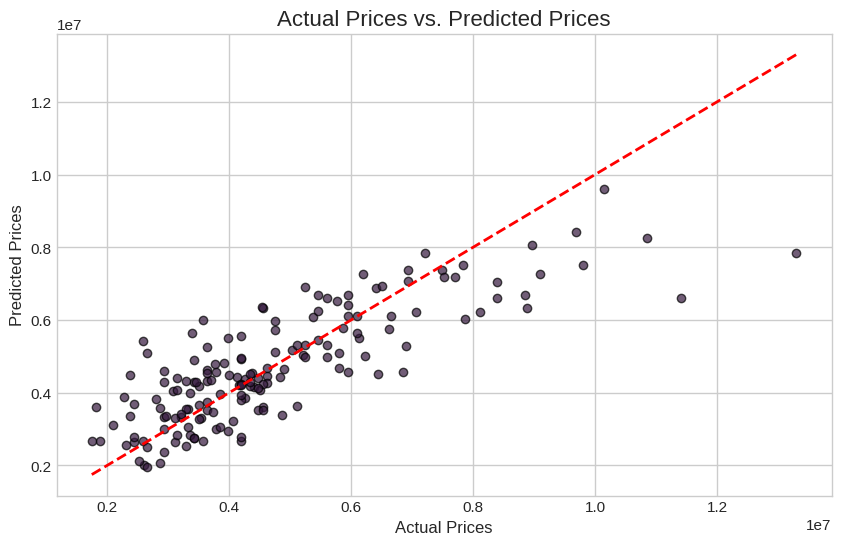


Analyzing the model's learned coefficients.

Starting price: $4,757,806.90
This is the average price when all home features are typical

What affects the price most:
How much each feature changes the home price:


,Price Change
area,535610.873187
bathrooms,512620.654974
stories,455736.669476
airconditioning,285559.689916
basement,261293.102068
parking,235057.691109
prefarea,216551.500199
furnishingstatus_unfurnished,-185753.837252
hotwaterheating,171000.597019
mainroad,163887.930562


In [9]:
print("Visualizing model predictions...")

# Scatter plot of Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Actual Prices vs. Predicted Prices", fontsize=16)
plt.show()

print("\nAnalyzing the model's learned coefficients.")
# Create a DataFrame to view coefficients with their feature names
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
intercept = model.intercept_

print(f"\nStarting price: ${intercept:,.2f}")
print("This is the average price when all home features are typical")

print("\nWhat affects the price most:")
print("How much each feature changes the home price:")
# Show most important factors first
coefficients['Effect Size'] = coefficients['Coefficient'].abs()
display(coefficients.sort_values('Effect Size', ascending=False)
         .drop('Effect Size', axis=1)
         .rename(columns={'Coefficient': 'Price Change'}))
